# load data
[Data source](https://seppe.net/aa/assignment1/#data)

In [1]:
import pickle

In [2]:
with open("./data/X_test.pickle", "rb") as input_file:
    X_test = pickle.load(input_file)
y_test = X_test.pop('price')

In [3]:
X_test.head()

,id,is_appartment,area,added_time,bedrooms,new_building,postcode,lat,lon,advertiser,...,lat_center,lon_center,distance_to_center,emp_rate,province_pop,province_size,mun_pop,mun_size,income,energy_label_encoded
22959,tr23031,True,50.0,2014-08-18 05:01:10,0.0,0,1081,50.86151,4.330580,Espace Immo Brussels Centre,...,50.861200,4.3314,0.067086,0.641,1249597.0,162.42,22648.0,1.18,21141,14.0
22276,tr22344,True,69.0,2015-04-24 01:56:50,2.0,0,9000,51.06441,3.728941,Vastgoed Ongenaet,...,51.050000,3.7167,1.816416,0.789,1572002.0,3007.05,269597.0,157.77,27371,15.0
13899,tr13922,True,120.0,2015-03-06 11:38:00,3.0,0,8620,51.13974,2.738489,Dewaele - Nieuwpoort,...,51.123367,2.7645,2.570764,0.790,1226375.0,3196.59,12542.0,97.21,28019,6.0
9022,tr9032,False,189.0,2010-06-12 12:04:40,3.0,0,7504,50.58190,3.329580,Team Construct,...,50.577200,3.3296,0.522618,0.643,1360074.0,3812.83,68554.0,215.34,25758,NaN
13494,tr13517,False,NaN,2014-09-07 05:34:50,0.0,0,1070,50.83942,4.334003,L'essentiel immobilier,...,50.836200,4.3145,1.415561,0.641,1249597.0,162.42,126581.0,17.91,20512,15.0


In [4]:
X_test.set_index('id',inplace=True)
X_test.drop(columns=['added_time'], inplace=True)

In [5]:

X_test['area'].min(), X_test['area'].max()

(np.float64(11.97), np.float64(1480.0))

In [6]:
for c in X_test.columns:
    col_type = X_test[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        X_test[c] = X_test[c].astype('category')

# load models

In [7]:
import lightgbm
from sklearn.metrics import mean_absolute_error
model = lightgbm.Booster(model_file='regression_model.joblib')
## accuracy metrics on test set
mean_absolute_error(y_test,model.predict(X_test))

65002.260263940116

# use forecast-verifier 

In [8]:
from forecast_verifier.verifier import Verifier
from forecast_verifier.model import Regressor
from forecast_verifier.graph import PerturbationDirection, EffectDirection
from forecast_verifier.dataset import PerturbationDataset

In [9]:
original_dataset = X_test.copy()
## assume that increased area leads to increased price
## decrease "area" across instances
perturbation_dataset = PerturbationDataset(original_dataset, ['area'], PerturbationDirection.decreasing)
perturbation_dataset = perturbation_dataset.multipicative_perturb(.5, bound=[10, 2000])
perturbation_dataset.head()

,is_appartment,area,bedrooms,new_building,postcode,lat,lon,advertiser,foto_amount,subtype,...,lat_center,lon_center,distance_to_center,emp_rate,province_pop,province_size,mun_pop,mun_size,income,energy_label_encoded
id,,,,,,,,,,,,,,,,,,,,,
tr23031,True,25.0,0.0,0,1081,50.86151,4.330580,Espace Immo Brussels Centre,8.0,Studio,...,50.861200,4.3314,0.067086,0.641,1249597.0,162.42,22648.0,1.18,21141,14.0
tr22344,True,34.5,2.0,0,9000,51.06441,3.728941,Vastgoed Ongenaet,12.0,Appartement,...,51.050000,3.7167,1.816416,0.789,1572002.0,3007.05,269597.0,157.77,27371,15.0
tr13922,True,60.0,3.0,0,8620,51.13974,2.738489,Dewaele - Nieuwpoort,25.0,Appartement,...,51.123367,2.7645,2.570764,0.790,1226375.0,3196.59,12542.0,97.21,28019,6.0
tr9032,False,94.5,3.0,0,7504,50.58190,3.329580,Team Construct,5.0,Woning,...,50.577200,3.3296,0.522618,0.643,1360074.0,3812.83,68554.0,215.34,25758,NaN
tr13517,False,NaN,0.0,0,1070,50.83942,4.334003,L'essentiel immobilier,28.0,Woning,...,50.836200,4.3145,1.415561,0.641,1249597.0,162.42,126581.0,17.91,20512,15.0


In [10]:
original_dataset.head()

,is_appartment,area,bedrooms,new_building,postcode,lat,lon,advertiser,foto_amount,subtype,...,lat_center,lon_center,distance_to_center,emp_rate,province_pop,province_size,mun_pop,mun_size,income,energy_label_encoded
id,,,,,,,,,,,,,,,,,,,,,
tr23031,True,50.0,0.0,0,1081,50.86151,4.330580,Espace Immo Brussels Centre,8.0,Studio,...,50.861200,4.3314,0.067086,0.641,1249597.0,162.42,22648.0,1.18,21141,14.0
tr22344,True,69.0,2.0,0,9000,51.06441,3.728941,Vastgoed Ongenaet,12.0,Appartement,...,51.050000,3.7167,1.816416,0.789,1572002.0,3007.05,269597.0,157.77,27371,15.0
tr13922,True,120.0,3.0,0,8620,51.13974,2.738489,Dewaele - Nieuwpoort,25.0,Appartement,...,51.123367,2.7645,2.570764,0.790,1226375.0,3196.59,12542.0,97.21,28019,6.0
tr9032,False,189.0,3.0,0,7504,50.58190,3.329580,Team Construct,5.0,Woning,...,50.577200,3.3296,0.522618,0.643,1360074.0,3812.83,68554.0,215.34,25758,NaN
tr13517,False,NaN,0.0,0,1070,50.83942,4.334003,L'essentiel immobilier,28.0,Woning,...,50.836200,4.3145,1.415561,0.641,1249597.0,162.42,126581.0,17.91,20512,15.0


In [11]:
class CustomRegressor(Regressor):
    def __init__(self, model):
        self.model = model
    def predict(self, dataset):
        return self.model.predict(dataset)
my_model = CustomRegressor(model)

In [12]:
verifier = Verifier(my_model, original_dataset, perturbation_dataset, ['area'], PerturbationDirection.decreasing, EffectDirection.positive)


In [13]:
verifier()

{'assumption': "['area'] → target",
 'relationship': 'EffectDirection.positive',
 'perturbation_direction': <PerturbationDirection.decreasing: -1>,
 'alignment_score': np.float64(0.893351458230351),
 'target_length': 8092}

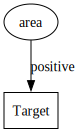

In [14]:
verifier.assumption_plot()